In [26]:
%config IPCompleter.greedy=True 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
test = pd.read_csv('../output/test.csv', sep=',', header=None)

In [5]:
test.sort_values(by=0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
52,1,Female,35-39,White,Married-civ-spouse,Secondary education,North America,Private,Other-service,<=50K,69520,70-80k,1520606062349,1520606063655
429,2,Female,30-34,White,Married-civ-spouse,Higher education,North America,Private,Other-service,<=50K,71767,20-30k,1520606062510,1520606067192
10,3,Male,30-34,White,Married-civ-spouse,Secondary education,North America,Private,Exec-managerial,>50K,20692,10-20k,1520606062516,1520606063042
11681,4,Male,25-29,Black,Divorced,Secondary education,North America,Private,Other-service,>50K,66690,90-100k,1520606062519,1520606076613
711,5,Female,20-24,White,Never-married,Higher education,North America,Private,Handlers-cleaners,<=50K,20256,50-60k,1520606062521,1520606067248
1997,6,Male,35-39,Black,Married-civ-spouse,Higher education,North America,Self-emp-not-inc,Craft-repair,<=50K,90301,40-50k,1520606062525,1520606068425
10072,7,Male,30-34,White,Separated,Secondary education,North America,Private,Protective-serv,>50K,32681,30-40k,1520606062527,1520606075175
712,8,Female,20-24,White,Never-married,Higher education,North America,State-gov,Adm-clerical,<=50K,15167,20-30k,1520606062530,1520606067249
383,9,Male,15-19,White,Never-married,Secondary education,North America,Private,Craft-repair,<=50K,28222,80-90k,1520606062534,1520606067187
676,11,Female,55-59,White,Married-civ-spouse,Higher education,North America,Private,Adm-clerical,<=50K,5360,70-80k,1520606062539,1520606067279


### Output Filenames
Output filenames are named: 

    "output-n_" + streamLength + "k_" + k + "l_" + l + "p_" + parallelism;




893 out of 20000 tuples stuck. (4.46%) 


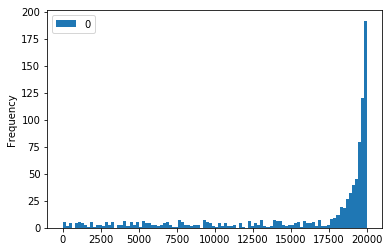

In [80]:
## READ FILE ACCORDING TO PARAMETERS ##
def ReadFile(k, l, p, n):
    filename = "output-n_{}k_{}l_{}p_{}.csv".format(n,k,l,p)
    names = ["id","sex","age","race","marst","educ","country","workclass","occ","salary","sensitive","sensitive_class","ingTimestamp","procTimestamp","latency"]
    data = pd.read_csv('../output/' + filename, sep=',', header=None, names = names)
    return data

k, l, p = 50, 10, 10
n = 20000

data = ReadFile(k, l, p, n)

stuck = StuckTuples(data, n)
print("{} out of {} tuples stuck. ({}%) ".format(stuck, n, round(stuck/n*100, 2)))
StuckDistribution(data, n)

In [64]:
def StuckTuples(data, n): 
    return n - data["id"].count()


2696 out of 20000 tuples stuck. (13.48%) 


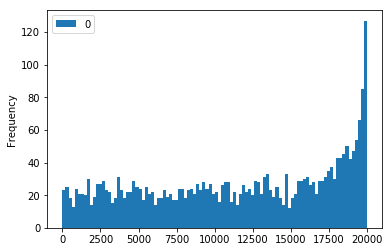

In [65]:
def GetStuckIds(data, n):
    allIds = pd.DataFrame(np.arange(n))
    ids = data["id"].as_matrix()
    #print(allIds.isin(ids).all(axis=1))
    stuckIds = allIds[~allIds.isin(ids).all(axis=1)]
    return stuckIds

    
def StuckDistribution(data, n):
    stuckIds = GetStuckIds(data, n)
    stuckIds.plot.hist(bins = 100)

StuckDistribution(data, n)

5487 out of 20000 tuples stuck. (27.44%) 
8239 out of 40000 tuples stuck. (20.6%) 
10829 out of 60000 tuples stuck. (18.05%) 
12478 out of 80000 tuples stuck. (15.6%) 
14549 out of 100000 tuples stuck. (14.55%) 
[5487, 8239, 10829, 12478, 14549]


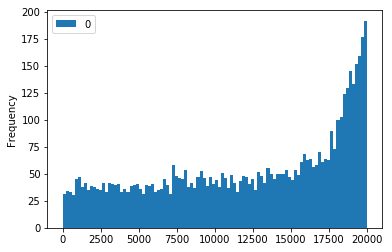

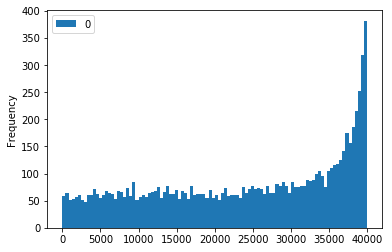

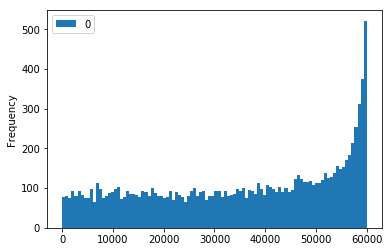

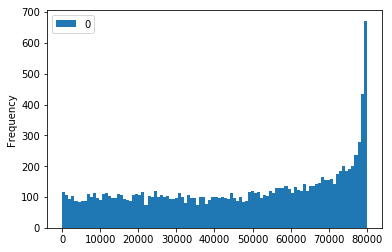

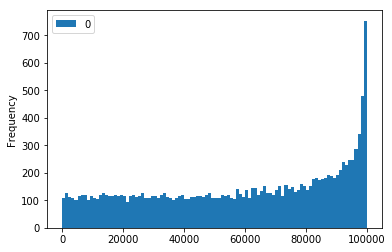

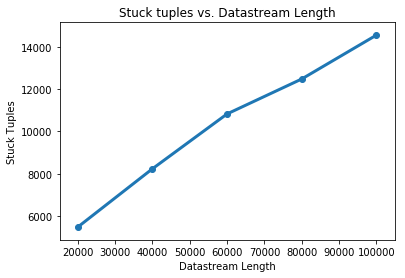

In [79]:
## For different N (constant k,l,p) get the number of stuck tuples. 
k, l, p = 50, 10, 10
dataframes, stuck = [], []
n_values = [20000, 40000, 60000, 80000, 100000]

for i,n in enumerate(n_values): 
    dataframes.append(ReadFile(k, l, p, n))
    s = StuckTuples(dataframes[i], n)
    stuck.append(s)
    print("{} out of {} tuples stuck. ({}%) ".format(s, n, round(s/n*100, 2)))
    
    StuckDistribution(dataframes[i], n)
    

print(stuck)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(n_values, stuck, linewidth=3)
ax.scatter(n_values, stuck, marker = "o")
ax.set(title='Stuck tuples vs. Datastream Length',
        xlabel = "Datastream Length",
        ylabel="Stuck Tuples")
plt.show()